In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
import time
from PIL import Image
from io import BytesIO
from adjustText import adjust_text


In [2]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

In [3]:
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats
from collections import Counter

In [4]:
import json

In [5]:
fake_shots = sorted(list(set([
    'Driving Dunk Shot',
    'Driving Finger Roll Layup Shot',
    'Driving Floating Bank Jump Shot',
    'Driving Floating Jump Shot',
    'Driving Hook Shot',
    'Driving Layup Shot',
    'Fadeaway Jump Shot',
    'Floating Jump shot',
    'Pullup Jump shot',
    'Step Back Jump shot',
    'Turnaround Fadeaway Bank Jump Shot',
    'Turnaround Hook Shot',
    'Turnaround Jump Shot',    
    "Turnaround Fadeaway shot",
    "Driving Reverse Layup Shot",
    "Driving Bank Hook Shot",
    "Step Back Bank Jump Shot",
    "Driving Reverse Dunk Shot",
    "Turnaround Bank Hook Shot",
    "Driving Finger Roll Shot",
    "Turnaround Finger Roll Shot",
    'Turnaround Bank shot',
    'Putback Dunk Shot',
    'Driving Jump shot',
    'Putback Layup Shot',
    'Driving Slam Dunk Shot',
    'Putback Slam Dunk Shot',
    'Fadeaway Bank shot',
    'Driving Bank shot',
    'Pullup Bank shot',
])))

print('"Fake" Assisted Shots')
print(json.dumps(fake_shots, indent=4))

"Fake" Assisted Shots
[
    "Driving Bank Hook Shot",
    "Driving Bank shot",
    "Driving Dunk Shot",
    "Driving Finger Roll Layup Shot",
    "Driving Finger Roll Shot",
    "Driving Floating Bank Jump Shot",
    "Driving Floating Jump Shot",
    "Driving Hook Shot",
    "Driving Jump shot",
    "Driving Layup Shot",
    "Driving Reverse Dunk Shot",
    "Driving Reverse Layup Shot",
    "Driving Slam Dunk Shot",
    "Fadeaway Bank shot",
    "Fadeaway Jump Shot",
    "Floating Jump shot",
    "Pullup Bank shot",
    "Pullup Jump shot",
    "Putback Dunk Shot",
    "Putback Layup Shot",
    "Putback Slam Dunk Shot",
    "Step Back Bank Jump Shot",
    "Step Back Jump shot",
    "Turnaround Bank Hook Shot",
    "Turnaround Bank shot",
    "Turnaround Fadeaway Bank Jump Shot",
    "Turnaround Fadeaway shot",
    "Turnaround Finger Roll Shot",
    "Turnaround Hook Shot",
    "Turnaround Jump Shot"
]


In [6]:
real_shots = sorted(list(set(['Alley Oop Dunk Shot',
'Alley Oop Layup shot',
'Cutting Dunk Shot',
'Cutting Finger Roll Layup Shot',
'Cutting Layup Shot',
'Dunk Shot',
'Jump Bank Shot',
'Jump Shot',
'Layup Shot',
'Hook Shot',
'Reverse Dunk Shot',
'Reverse Layup Shot',
'Running Alley Oop Dunk Shot',
'Running Alley Oop Layup Shot',
'Running Dunk Shot',
'Running Finger Roll Layup Shot',
'Running Jump Shot',
'Running Layup Shot',
'Running Pull-Up Jump Shot',
'Running Reverse Layup Shot',
"Hook Bank Shot",
"Finger Roll Layup Shot",
"Running Reverse Dunk Shot",
"Slam Dunk Shot",
"Jump Hook Shot",
"Running Hook Shot",
"Follow Up Dunk Shot",
"Finger Roll Shot",
"Running Finger Roll Shot",
"Running Tip Shot",
"Jump Shot",
"Layup Shot",
"Dunk Shot",
"Hook Shot",
'Running Slam Dunk Shot',
'Running Bank Hook Shot',
'Running Bank shot',
'Reverse Slam Dunk Shot',
'Jump Bank Hook Shot',])))

print(f'"Real" Assisted Shots')
print(json.dumps(real_shots, indent=4))

"Real" Assisted Shots
[
    "Alley Oop Dunk Shot",
    "Alley Oop Layup shot",
    "Cutting Dunk Shot",
    "Cutting Finger Roll Layup Shot",
    "Cutting Layup Shot",
    "Dunk Shot",
    "Finger Roll Layup Shot",
    "Finger Roll Shot",
    "Follow Up Dunk Shot",
    "Hook Bank Shot",
    "Hook Shot",
    "Jump Bank Hook Shot",
    "Jump Bank Shot",
    "Jump Hook Shot",
    "Jump Shot",
    "Layup Shot",
    "Reverse Dunk Shot",
    "Reverse Layup Shot",
    "Reverse Slam Dunk Shot",
    "Running Alley Oop Dunk Shot",
    "Running Alley Oop Layup Shot",
    "Running Bank Hook Shot",
    "Running Bank shot",
    "Running Dunk Shot",
    "Running Finger Roll Layup Shot",
    "Running Finger Roll Shot",
    "Running Hook Shot",
    "Running Jump Shot",
    "Running Layup Shot",
    "Running Pull-Up Jump Shot",
    "Running Reverse Dunk Shot",
    "Running Reverse Layup Shot",
    "Running Slam Dunk Shot",
    "Running Tip Shot",
    "Slam Dunk Shot"
]


In [7]:
fake_shots = [
    'Driving Dunk Shot',
    'Driving Finger Roll Layup Shot',
    'Driving Floating Bank Jump Shot',
    'Driving Floating Jump Shot',
    'Driving Hook Shot',
    'Driving Layup Shot',
    'Fadeaway Jump Shot',
    'Floating Jump shot',
    'Pullup Jump shot',
    'Step Back Jump shot',
    'Turnaround Fadeaway Bank Jump Shot',
    'Turnaround Hook Shot',
    'Turnaround Jump Shot',    
    "Turnaround Fadeaway shot",
    "Driving Reverse Layup Shot",
    "Driving Bank Hook Shot",
    "Step Back Bank Jump Shot",
    "Driving Reverse Dunk Shot",
    "Turnaround Bank Hook Shot",
    "Driving Finger Roll Shot",
    "Turnaround Finger Roll Shot",
    'Turnaround Bank shot',
    'Putback Dunk Shot',
    'Driving Jump shot',
    'Putback Layup Shot',
    'Driving Slam Dunk Shot',
    'Putback Slam Dunk Shot',
    'Fadeaway Bank shot',
    'Driving Bank shot',
    'Pullup Bank shot',
    'Putback Reverse Dunk Shot',
    "Tip Shot",
]


real_shots = [
    'Alley Oop Dunk Shot',
    'Alley Oop Layup shot',
    'Cutting Dunk Shot',
    'Cutting Finger Roll Layup Shot',
    'Cutting Layup Shot',
    'Dunk Shot',
    'Jump Bank Shot',
    'Jump Shot',
    'Layup Shot',
    'Hook Shot',
    'Reverse Dunk Shot',
    'Reverse Layup Shot',
    'Running Alley Oop Dunk Shot',
    'Running Alley Oop Layup Shot',
    'Running Dunk Shot',
    'Running Finger Roll Layup Shot',
    'Running Jump Shot',
    'Running Layup Shot',
    'Running Pull-Up Jump Shot',
    'Running Reverse Layup Shot',
    "Hook Bank Shot",
    "Finger Roll Layup Shot",
    "Running Reverse Dunk Shot",
    "Slam Dunk Shot",
    "Jump Hook Shot",
    "Running Hook Shot",
    "Follow Up Dunk Shot",
    "Finger Roll Shot",
    "Running Finger Roll Shot",
    "Running Tip Shot",
    "Jump Shot",
    "Layup Shot",
    "Dunk Shot",
    "Hook Shot",
    'Running Slam Dunk Shot',
    'Running Bank Hook Shot',
    'Running Bank shot',
    'Reverse Slam Dunk Shot',
    'Jump Bank Hook Shot',

]

type_map = {'Jump Shot': 1,
    'Pullup Jump shot': 79,
    'Alley Oop Dunk Shot': 52,
    'Hook Shot': 3,
    'Step Back Jump shot': 80,
    'Turnaround Jump Shot': 47,
    'Layup Shot': 5,
    'Running Pull-Up Jump Shot': 103,
    'Driving Layup Shot': 6,
    'Running Dunk Shot': 50,
    'Cutting Dunk Shot': 108,
    'Alley Oop Layup shot': 43,
    'Driving Floating Jump Shot': 101,
    'Running Jump Shot': 2,
    'Turnaround Fadeaway shot': 86,
    'Fadeaway Jump Shot': 63,
    'Floating Jump shot': 78,
    'Cutting Layup Shot': 98,
    'Running Layup Shot': 41,
    'Dunk Shot': 7,
    'Driving Dunk Shot': 9,
    'Cutting Finger Roll Layup Shot': 99,
    'Running Finger Roll Layup Shot': 76,
    'Turnaround Hook Shot': 58,
    'Running Alley Oop Dunk Shot': 106,
    'Driving Floating Bank Jump Shot': 102,
    'Running Alley Oop Layup Shot': 100,
    'Driving Reverse Layup Shot': 73,
    'Turnaround Fadeaway Bank Jump Shot': 105,
    'Driving Finger Roll Layup Shot': 75,
    'Reverse Layup Shot': 44,
    'Running Reverse Layup Shot': 74,
    'Jump Bank Shot': 66,
    'Driving Hook Shot': 57,
    'Hook Bank Shot': 67,
    'Finger Roll Layup Shot': 71,
    'Driving Bank Hook Shot': 93,
    'Reverse Dunk Shot': 51,
    'Running Reverse Dunk Shot': 110,
    'Step Back Bank Jump Shot': 104,
    'Driving Reverse Dunk Shot': 109,
    'Turnaround Bank Hook Shot': 96
}

reverse_type_map = {1: 'Jump Shot',
 79: 'Pullup Jump shot',
 52: 'Alley Oop Dunk Shot',
 3: 'Hook Shot',
 80: 'Step Back Jump shot',
 47: 'Turnaround Jump Shot',
 5: 'Layup Shot',
 103: 'Running Pull-Up Jump Shot',
 6: 'Driving Layup Shot',
 50: 'Running Dunk Shot',
 108: 'Cutting Dunk Shot',
 43: 'Alley Oop Layup shot',
 101: 'Driving Floating Jump Shot',
 2: 'Running Jump Shot',
 86: 'Turnaround Fadeaway shot',
 63: 'Fadeaway Jump Shot',
 78: 'Floating Jump shot',
 98: 'Cutting Layup Shot',
 41: 'Running Layup Shot',
 7: 'Dunk Shot',
 9: 'Driving Dunk Shot',
 99: 'Cutting Finger Roll Layup Shot',
 76: 'Running Finger Roll Layup Shot',
 58: 'Turnaround Hook Shot',
 106: 'Running Alley Oop Dunk Shot',
 102: 'Driving Floating Bank Jump Shot',
 100: 'Running Alley Oop Layup Shot',
 73: 'Driving Reverse Layup Shot',
 105: 'Turnaround Fadeaway Bank Jump Shot',
 75: 'Driving Finger Roll Layup Shot',
 44: 'Reverse Layup Shot',
 74: 'Running Reverse Layup Shot',
 66: 'Jump Bank Shot',
 57: 'Driving Hook Shot',
 67: 'Hook Bank Shot',
 71: 'Finger Roll Layup Shot',
 93: 'Driving Bank Hook Shot',
 51: 'Reverse Dunk Shot',
 110: 'Running Reverse Dunk Shot',
 104: 'Step Back Bank Jump Shot',
 109: 'Driving Reverse Dunk Shot',
 96: 'Turnaround Bank Hook Shot',
 8: 'Slam Dunk Shot',
 42: 'Driving Layup Shot',
 4: 'Tip Shot',
 65: 'Jump Hook Shot',
 46: 'Running Jump Shot',
 49: 'Driving Dunk Shot',
 56: 'Running Hook Shot',
 64: 'Follow Up Dunk Shot',
 59: 'Finger Roll Shot',
 61: 'Driving Finger Roll Shot',
 60: 'Running Finger Roll Shot',
 62: 'Turnaround Finger Roll Shot',
 54: 'Running Tip Shot',
 53: 'Tip Shot',
 45: 'Jump Shot',
 40: 'Layup Shot',
 48: 'Dunk Shot',
 55: 'Hook Shot',
 85: 'Turnaround Bank shot',
 87: 'Putback Dunk Shot',
 77: 'Driving Jump shot',
 72: 'Putback Layup Shot',
 90: 'Running Slam Dunk Shot',
 88: 'Driving Slam Dunk Shot',
 92: 'Putback Slam Dunk Shot',
 83: 'Fadeaway Bank shot',
 95: 'Running Bank Hook Shot',
 84: 'Running Bank shot',
 89: 'Reverse Slam Dunk Shot',
 82: 'Driving Bank shot',
 81: 'Pullup Bank shot',
 91: 'Putback Reverse Dunk Shot',
 94: 'Jump Bank Hook Shot',
                   }

In [8]:
full_df = pd.read_csv('pbp_data/2022-23.csv')

full_df = full_df.fillna({
    "HOMEDESCRIPTION": "",
    "NEUTRALDESCRIPTION": "",
    "VISITORDESCRIPTION": ""
})
full_df.loc[:, 'GAME_ID'] = [f"00{item}" for item in full_df.GAME_ID.astype(str)]

In [9]:
season = '2022-23'

In [10]:
shots = ShotChartDetail(team_id=0, player_id=0, context_measure_simple='FGM', season_nullable=season)

shots_df = shots.get_data_frames()[0]

In [11]:
league_stats = LeagueDashPlayerStats(per_mode_detailed='PerGame', season=season, season_type_all_star='Regular Season')

league_df = league_stats.get_data_frames()[0]

top_passers = league_df.loc[league_df.GP > 15].sort_values(by='AST_RANK').iloc[:30]

In [12]:
types = shots_df.ACTION_TYPE.unique().tolist()

In [13]:
player_assist_info = {}
for i in range(len(top_passers)):
    cur_row = top_passers.iloc[i]
    player_assists = full_df.loc[(full_df.PLAYER2_ID == cur_row.PLAYER_ID) & (full_df.EVENTMSGTYPE == 1)]
    merged_df = pd.merge(left=shots_df, right=player_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID", "EVENTNUM"))
        
    assist_info = Counter()
    value_counts = merged_df.ACTION_TYPE.value_counts().to_dict()
    for key in value_counts:
        if key in fake_shots:
            assist_info['created'] += value_counts[key]
        else:
            assist_info['non_created'] += value_counts[key]
    player_assist_info[cur_row.PLAYER_ID] = {
        'PLAYER_NAME': cur_row.PLAYER_NAME,
        'FAKE': assist_info['created'],
        'REAL': assist_info['non_created'],
        'AST_G': cur_row.AST 
    }

In [14]:
created_list = []
real_assists = []
player_names = []
assists_list = []
for player_id in player_assist_info:
    total_assists = player_assist_info[player_id]['FAKE'] + player_assist_info[player_id]['REAL']
    player_names.append(player_assist_info[player_id]['PLAYER_NAME'])
    created_list.append(round(player_assist_info[player_id]['FAKE'] / total_assists * 100))
    real_assists.append(round(player_assist_info[player_id]['REAL'] / total_assists * 100))
    assists_list.append(total_assists)

assist_counts = pd.DataFrame(player_assist_info).transpose()

In [15]:
assist_df = pd.DataFrame(data={
    'PLAYER_NAME': player_names,
    'FAKE': created_list,
    'REAL': real_assists,
    'AST_G': assists_list
})

In [16]:
plt.style.use('fivethirtyeight')

sorted_assist = assist_df.sort_values(by='REAL', ascending=True)

ax_labels = [f"{sorted_assist.iloc[i].PLAYER_NAME} ({sorted_assist.iloc[i].AST_G})" for i in range(len(sorted_assist))]

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


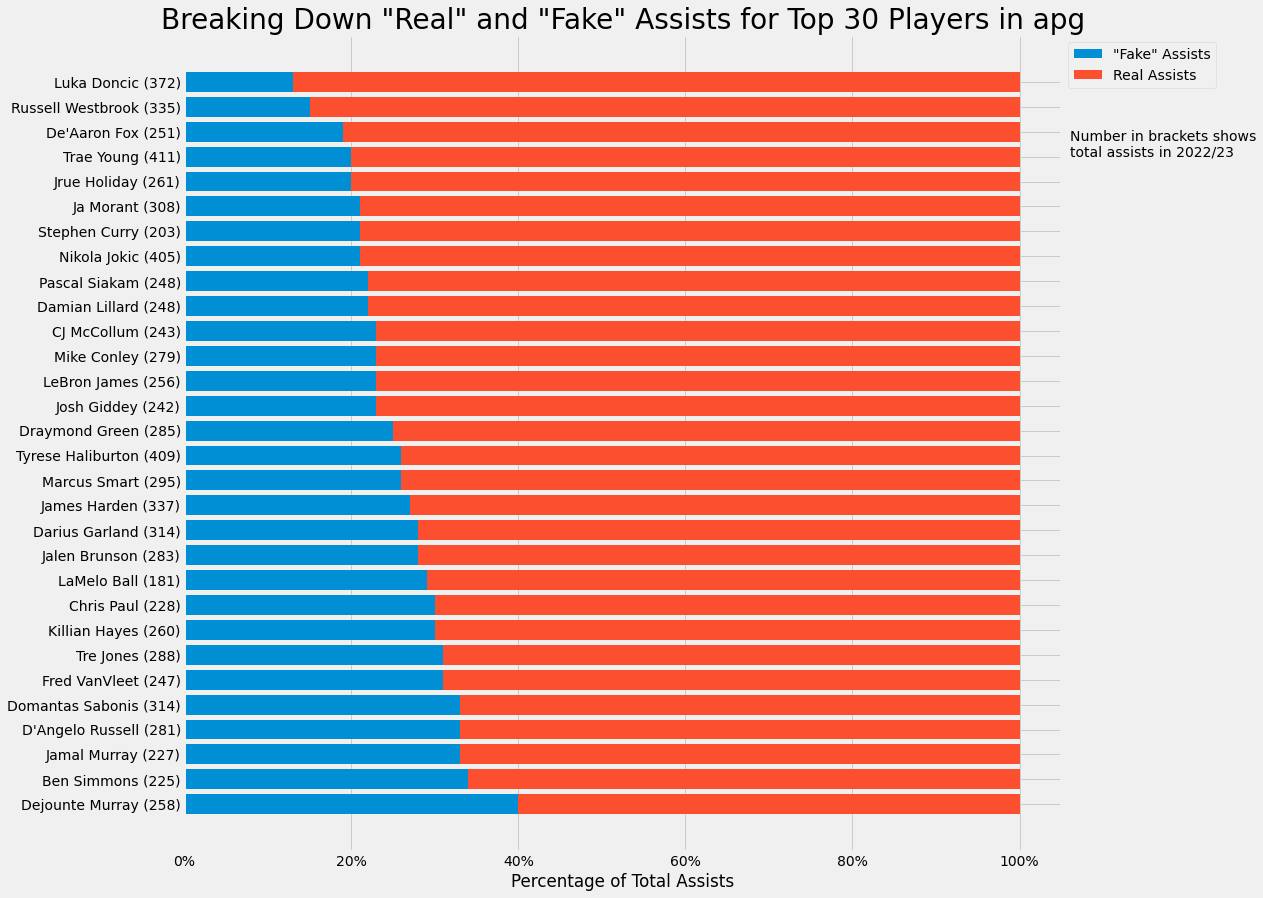

In [17]:
fig, ax = plt.subplots(figsize=(14, 14))


ax.barh(y=ax_labels, width=sorted_assist.FAKE.tolist(), label='"Fake" Assists')
ax.barh(y=ax_labels, width=sorted_assist.REAL.tolist(), left=sorted_assist.FAKE.tolist(), label='Real Assists')
ax.set_title('Breaking Down "Real" and "Fake" Assists for Top 30 Players in apg', size=28)
ax.set_xlabel("Percentage of Total Assists")
#ax.set_xticks([tick for tick in range(0, 110, 20)])
ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))
ax.text(x=106, y=26, s='Number in brackets shows\ntotal assists in 2022/23')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Year by year

In [18]:
all_assists = full_df.loc[(full_df.EVENTMSGTYPE == 1) & (full_df.PLAYER2_ID != 0)]

In [19]:
assist_total = all_assists.groupby('EVENTMSGACTIONTYPE').EVENTNUM.count().to_frame().reset_index().rename(columns={'EVENTNUM': 'COUNT'})

In [20]:
type_list = [reverse_type_map[key] for key in assist_total.EVENTMSGACTIONTYPE.tolist()]

In [21]:
assist_total.loc[:, 'TYPE'] = type_list

In [22]:
assist_total.loc[assist_total.TYPE.isin(real)].COUNT.sum()

NameError: name 'real' is not defined

In [23]:
assist_total.loc[assist_total.TYPE.isin(fake)].COUNT.sum()

NameError: name 'fake' is not defined

In [24]:
seasons = [f"{season}-{str(season+1)[-2:]}" for season in range(2001, 2022)]

In [25]:
season

'2021-22'

In [26]:
shots_df = ShotChartDetail(player_id=0, team_id=0, season_nullable=season).get_data_frames()[0]

In [27]:
merged_cur = pd.merge(left=shots_df, right=all_assists, left_on=("GAME_ID", "GAME_EVENT_ID"), right_on=("GAME_ID", "EVENTNUM"))

In [28]:
types = merged_cur.EVENTMSGACTIONTYPE.unique()

In [29]:
new_dict = {}
for t in types:
    print(f'{t}: "{merged_cur.loc[merged_cur.EVENTMSGACTIONTYPE == t].iloc[0].ACTION_TYPE}",')
    new_dict[t] = merged_cur.loc[merged_cur.EVENTMSGACTIONTYPE == t].iloc[0].ACTION_TYPE

52: "Alley Oop Dunk Shot",
1: "Jump Shot",
47: "Turnaround Jump Shot",
50: "Running Dunk Shot",
43: "Alley Oop Layup shot",
79: "Pullup Jump shot",
108: "Cutting Dunk Shot",
103: "Running Pull-Up Jump Shot",
2: "Running Jump Shot",
6: "Driving Layup Shot",
98: "Cutting Layup Shot",
105: "Turnaround Fadeaway Bank Jump Shot",
100: "Running Alley Oop Layup Shot",
101: "Driving Floating Jump Shot",
75: "Driving Finger Roll Layup Shot",
80: "Step Back Jump shot",
3: "Hook Shot",
78: "Floating Jump shot",
41: "Running Layup Shot",
99: "Cutting Finger Roll Layup Shot",
44: "Reverse Layup Shot",
86: "Turnaround Fadeaway shot",
5: "Layup Shot",
66: "Jump Bank Shot",
7: "Dunk Shot",
58: "Turnaround Hook Shot",
73: "Driving Reverse Layup Shot",
9: "Driving Dunk Shot",
106: "Running Alley Oop Dunk Shot",
63: "Fadeaway Jump Shot",
74: "Running Reverse Layup Shot",
71: "Finger Roll Layup Shot",
102: "Driving Floating Bank Jump Shot",
76: "Running Finger Roll Layup Shot",
51: "Reverse Dunk Shot",
57:

In [30]:
for key in new_dict:
    if key not in reverse_type_map:
        print(key, new_dict[key])
        #reverse_type_map[key] = new_dict[key]

In [31]:
all_assists.loc[all_assists.EVENTMSGACTIONTYPE == 87 ]

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESECONDS,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VIDEO_AVAILABLE_FLAG,VISITORDESCRIPTION,WCTIMESTRING


In [32]:
all_assists.loc[all_assists.EVENTMSGACTIONTYPE == 40]

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESECONDS,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VIDEO_AVAILABLE_FLAG,VISITORDESCRIPTION,WCTIMESTRING


In [33]:
real = []
fake = []
total = []

ignore_keys = [0, 97, 107]

for season in seasons:
    print(season)
    full_df = pd.read_csv(f'pbp_data/{season}.csv')

    full_df = full_df.fillna({
        "HOMEDESCRIPTION": "",
        "NEUTRALDESCRIPTION": "",
        "VISITORDESCRIPTION": ""
    })
    full_df.loc[:, 'GAME_ID'] = [f"00{item}" for item in full_df.GAME_ID.astype(str)]
    all_assists = full_df.loc[(full_df.EVENTMSGTYPE == 1) & (full_df.PLAYER2_ID != 0)]
    
    assist_total = all_assists.groupby('EVENTMSGACTIONTYPE').EVENTNUM.count().to_frame().reset_index().rename(columns={'EVENTNUM': 'COUNT'})
    assist_total = assist_total.loc[~assist_total.EVENTMSGACTIONTYPE.isin(ignore_keys)]
    type_list = [reverse_type_map[key] for key in assist_total.EVENTMSGACTIONTYPE.tolist() if key not in ignore_keys]

    assist_total.loc[:, 'TYPE'] = type_list

    real.append(assist_total.loc[assist_total.TYPE.isin(real_shots)].COUNT.sum())
    fake.append(assist_total.loc[assist_total.TYPE.isin(fake_shots)].COUNT.sum())
    total.append(assist_total.loc[assist_total.TYPE.isin(real_shots)].COUNT.sum() + assist_total.loc[assist_total.TYPE.isin(fake_shots)].COUNT.sum())

2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2021-22


In [34]:
real_fake_breakdown = pd.DataFrame(
    data={
        'SEASON': seasons,
        'REAL': real,
        'FAKE': fake,
        'TOTAL': total
    }
)

In [35]:

real_fake_breakdown.loc[:, 'REAL_PCT'] = (real_fake_breakdown.REAL / real_fake_breakdown.TOTAL * 100).round(2)
real_fake_breakdown.loc[:, 'FAKE_PCT'] = (real_fake_breakdown.FAKE / real_fake_breakdown.TOTAL * 100).round(2)

In [36]:
real_fake_breakdown

,SEASON,REAL,FAKE,TOTAL,REAL_PCT,FAKE_PCT
0,2001-02,47774,4357,52131,91.64,8.36
1,2002-03,46665,4468,51133,91.26,8.74
2,2003-04,46250,4408,50658,91.30,8.70
3,2004-05,48155,4187,52342,92.00,8.00
4,2005-06,46353,4358,50711,91.41,8.59
5,2006-07,48290,4075,52365,92.22,7.78
6,2007-08,48277,5229,53506,90.23,9.77
7,2008-09,46025,5580,51605,89.19,10.81
8,2009-10,45710,6548,52258,87.47,12.53
9,2010-11,46477,6410,52887,87.88,12.12


In [40]:
real_fake_breakdown = real_fake_breakdown.sort_values(by='SEASON', ascending=False)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


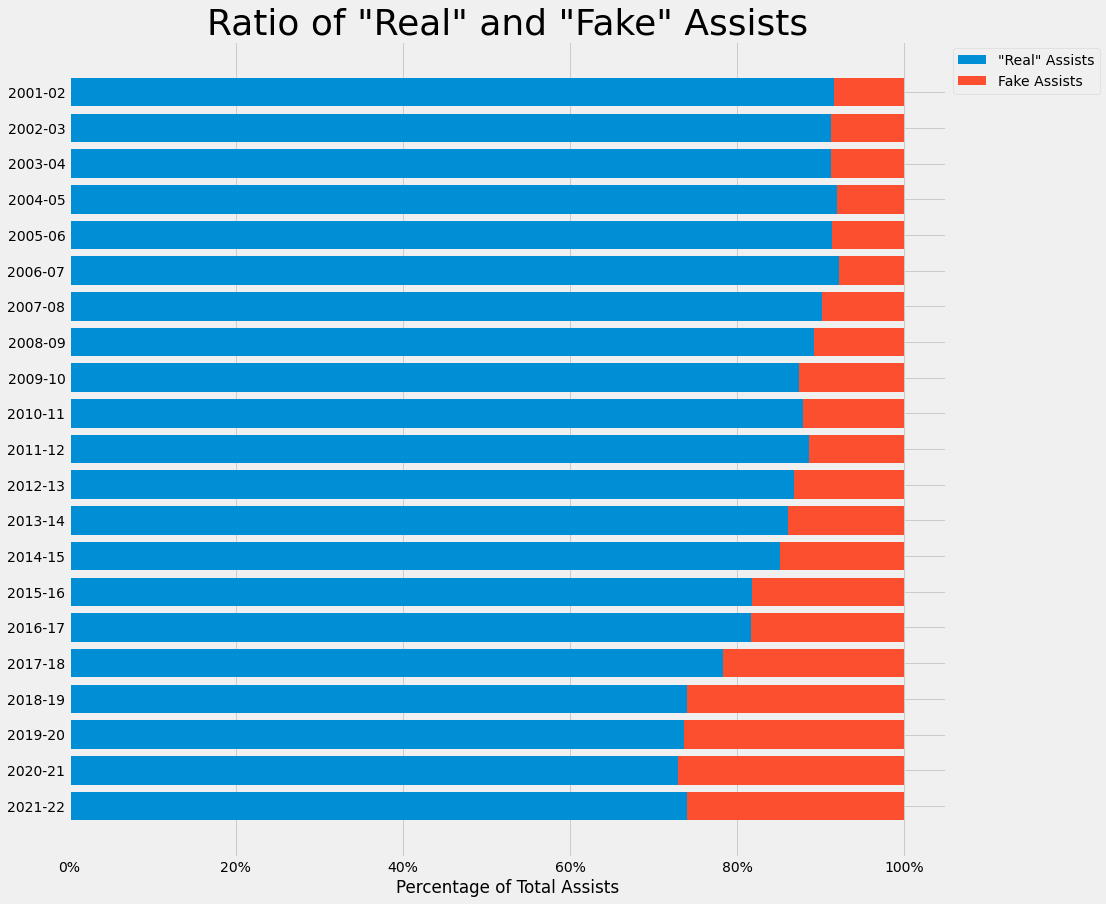

In [44]:
fig, ax = plt.subplots(figsize=(14, 14))


ax.barh(y=real_fake_breakdown.SEASON, width=real_fake_breakdown.REAL_PCT.tolist(), label='"Real" Assists')
ax.barh(y=real_fake_breakdown.SEASON, width=real_fake_breakdown.FAKE_PCT.tolist(), left=real_fake_breakdown.REAL_PCT.tolist(), label='Fake Assists')
ax.set_title('Ratio of "Real" and "Fake" Assists', size=36)
ax.set_xlabel("Percentage of Total Assists")
#ax.set_xticks([tick for tick in range(0, 110, 20)])
ax.set_xticklabels(f"{item}%" for item in range(0, 105, 20))
#ax.text(x=106, y=36, s='Number in brackets shows\ntotal assists in 2019/20')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [58]:
full_df = pd.read_csv(f'pbp_data/2001-02.csv')


In [61]:
shot_df = ShotChartDetail(team_id=0, player_id=0, season_nullable='2001-02', timeout=300).get_data_frames()[0]

In [64]:
len(shot_df.ACTION_TYPE.unique().tolist())

['Jump Shot',
 'Slam Dunk Shot',
 'Layup Shot',
 'Driving Layup Shot',
 'Tip Shot',
 'Turnaround Hook Shot',
 'Jump Hook Shot',
 'Turnaround Jump Shot',
 'Hook Shot',
 'Running Jump Shot',
 'Driving Dunk Shot',
 'Alley Oop Dunk Shot',
 'Running Hook Shot',
 'Reverse Layup Shot',
 'Running Dunk Shot',
 'Fadeaway Jump Shot',
 'Dunk Shot',
 'Running Layup Shot',
 'Reverse Dunk Shot',
 'Follow Up Dunk Shot',
 'Alley Oop Layup shot',
 'Finger Roll Shot',
 'Driving Finger Roll Shot',
 'Running Finger Roll Shot',
 'Driving Hook Shot',
 'Turnaround Finger Roll Shot',
 'Running Tip Shot']

In [65]:
len(shot_df.ACTION_TYPE.unique().tolist())

27

In [66]:
shot_df = ShotChartDetail(team_id=0, player_id=0, season_nullable='2021-22', timeout=300).get_data_frames()[0]

In [67]:
len(shot_df.ACTION_TYPE.unique().tolist())

46

In [73]:
avg_game = pd.read_csv('per_game_avg.csv', sep=',')

In [76]:
merged_df = pd.merge(left=avg_game, right=real_fake_breakdown, left_on='Season', right_on='SEASON')

In [84]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick


Text(0.5, 1.0, 'Correlation between assists per game and ratio of real assists')

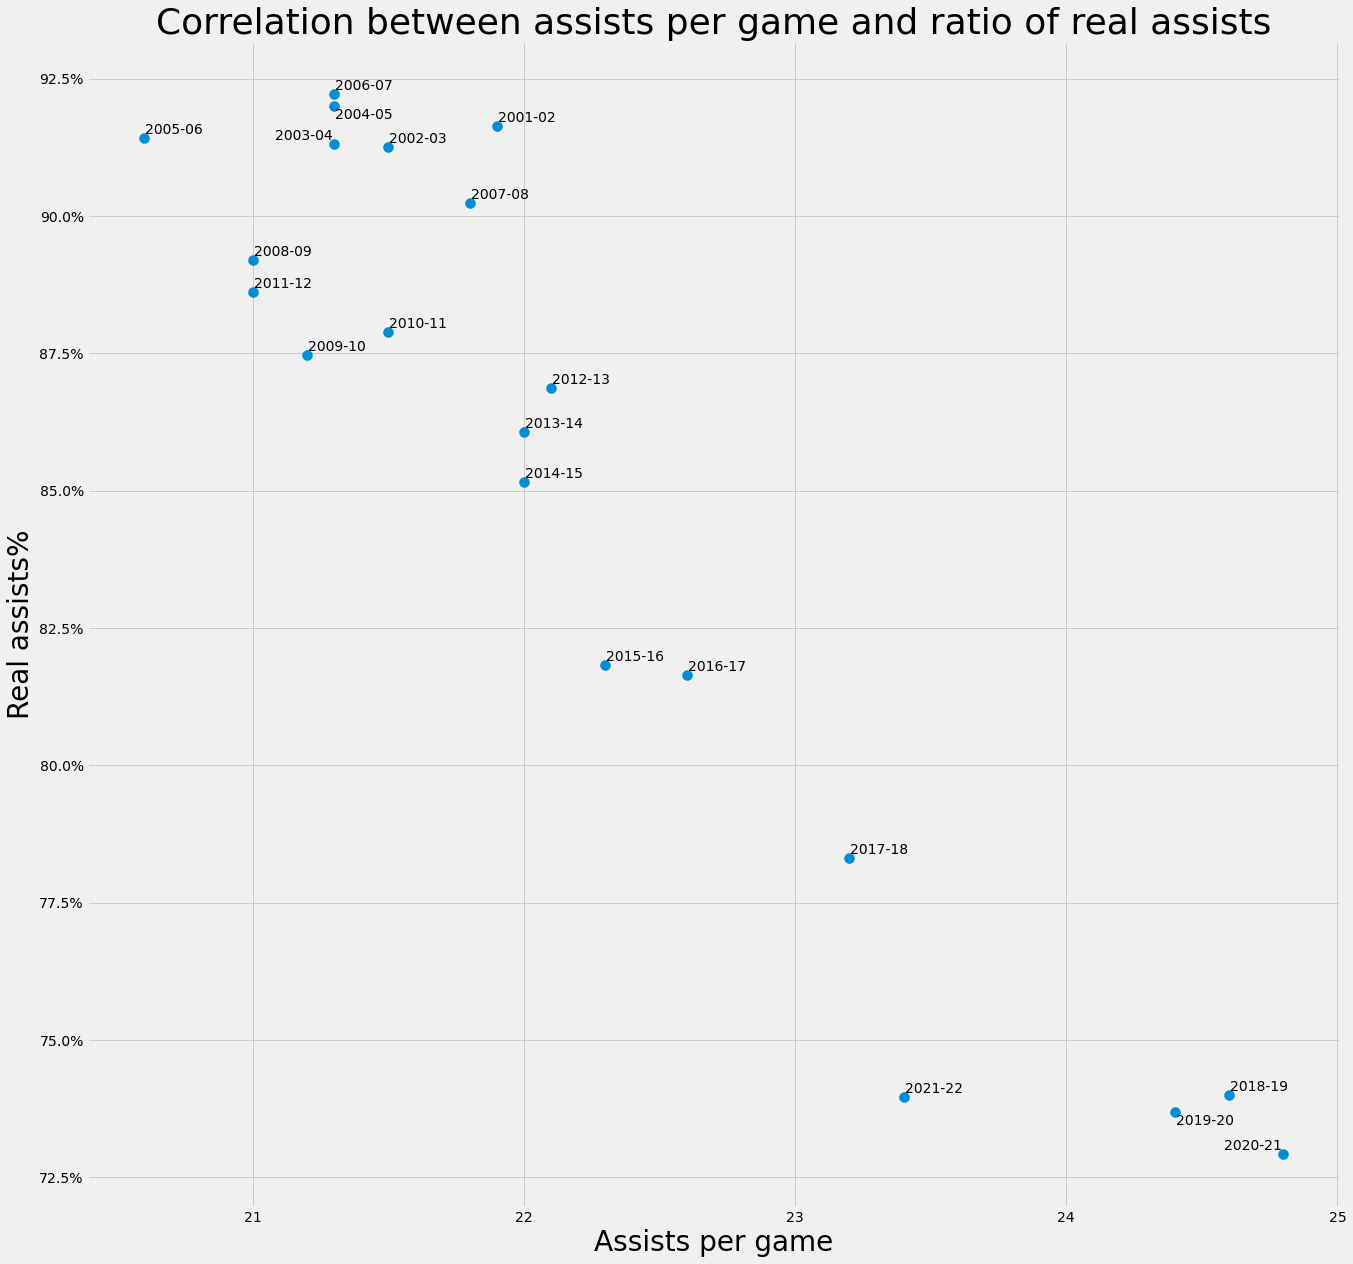

In [85]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=merged_df.AST, y=merged_df.REAL_PCT, s=100)

texts = []
for i in range(len(merged_df)):
    row = merged_df.iloc[i]
    texts.append(ax.text(x=row.AST, y=row.REAL_PCT, s=row.Season))

adjust_text(texts)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel("Assists per game", size=28)
ax.set_ylabel("Real assists%", size=28)
ax.set_title("Correlation between assists per game and ratio of real assists", size=36)

In [87]:
merged_df.AST.corr(merged_df.REAL_PCT)

-0.9325756731493218

In [86]:
merged_df.corr()

,Rk,Age,Wt,G,MP,FG,FGA,3P,3PA,FT,...,eFG%,TOV%,ORB%,FT/FGA,ORtg,REAL,FAKE,TOTAL,REAL_PCT,FAKE_PCT
Rk,1.000000,0.802695,0.163577,0.423625,0.507136,-0.907791,-0.906016,-0.940914,-0.942686,0.696691,...,-0.904133,0.792789,0.964123,0.849982,-0.743285,0.550807,-0.717070,0.210476,0.935911,-0.935911
Age,0.802695,1.000000,0.099075,0.183097,0.243127,-0.777221,-0.649716,-0.766785,-0.749120,0.258078,...,-0.873215,0.641425,0.791458,0.445725,-0.826778,0.319203,-0.667855,0.022307,0.734939,-0.734939
Wt,0.163577,0.099075,1.000000,0.578406,0.494945,-0.364562,-0.441060,-0.454942,-0.463012,0.164325,...,-0.324049,0.292040,0.262314,0.276416,-0.336667,0.555989,-0.073758,0.469253,0.417029,-0.417029
G,0.423625,0.183097,0.578406,1.000000,0.448495,-0.288734,-0.433103,-0.462273,-0.501800,0.613528,...,-0.268221,0.179953,0.336369,0.576608,-0.121039,0.985686,0.196562,0.961222,0.444323,-0.444323
MP,0.507136,0.243127,0.494945,0.448495,1.000000,-0.598336,-0.629591,-0.619287,-0.616316,0.545455,...,-0.549162,0.676231,0.562981,0.625529,-0.517184,0.497135,-0.361765,0.302723,0.618067,-0.618067
FG,-0.907791,-0.777221,-0.364562,-0.288734,-0.598336,1.000000,0.957424,0.962298,0.951607,-0.519916,...,0.967103,-0.913756,-0.943309,-0.752616,0.896904,-0.413157,0.846280,-0.036043,-0.960465,0.960465
FGA,-0.906016,-0.649716,-0.441060,-0.433103,-0.629591,0.957424,1.000000,0.971851,0.975412,-0.658695,...,0.876471,-0.862268,-0.922384,-0.862926,0.755133,-0.541098,0.781163,-0.176454,-0.984748,0.984748
3P,-0.940914,-0.766785,-0.454942,-0.462273,-0.619287,0.962298,0.971851,1.000000,0.998012,-0.628982,...,0.938625,-0.849000,-0.957334,-0.828164,0.820704,-0.576849,0.754539,-0.219018,-0.986457,0.986457
3PA,-0.942686,-0.749120,-0.463012,-0.501800,-0.616316,0.951607,0.975412,0.998012,1.000000,-0.652039,...,0.920876,-0.835238,-0.953073,-0.844635,0.792061,-0.613400,0.729425,-0.261704,-0.987891,0.987891
FT,0.696691,0.258078,0.164325,0.613528,0.545455,-0.519916,-0.658695,-0.628982,-0.652039,1.000000,...,-0.441667,0.396727,0.603139,0.947947,-0.182039,0.661517,-0.308092,0.471278,0.657317,-0.657317
